In [1]:
import numpy as np
import pandas as pd

from globalbonds.dataio.data_lib import DataLib
from plotnine import *

dlib = DataLib('../SignalData')
dlib.list()

GDP-Real
EquityPrices
LongRates
CurrAcctNom-inUSD
CoreCPI-SA
fxTrdWts-Real
M3-inUSD
CurrAcctPctGDP
fxTrdWts-Nominal
BondRetIdx-LocalFX
fxVsUSD
M2-inUSD
M1-inUSD
ShortRates
GDP-Nominal


In [2]:
def center_using_historical_rolling_mean(tbl, window=6, gap=1):
    """Return a centered DataFrame.

    Center using a rolling mean calculated only on historical data.

    Default is to use previous five months to center current month
    e.g. center June using Jan-May
    """
    center = tbl.mean(axis=1).rolling(window).apply(
        lambda x: x[:window - gap].mean()
    )
    centered = (tbl.T - center).T
    return centered


def scale_using_historical_rolling_max(centered, window=6, gap=1):
    """Return a scaled DataFrame.

    Scale using a rolling mean of max values calculated only on
    historical data.

    Default is to use previous five months to scale current month
    e.g. scale June using Jan-May
    """
    centered_scaled = (centered.T / centered.abs().max(axis=1)).T
    scale = centered.abs().max(axis=1).rolling(window).apply(
        lambda x: x[:window - gap].mean()
    )
    centered_scaled = (centered.T / scale).T
    return centered_scaled


def center_scale_data(tbl):
    """Return a centered and scaled DataFrame."""
    centered = center_using_historical_rolling_mean(tbl)
    centered_scaled = scale_using_historical_rolling_max(centered)
    return centered_scaled


In [3]:
tbl = dlib.pull('LongRates') - dlib.pull('ShortRates')
tbl = center_scale_data(tbl)

tbl

/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # Remove the CWD from sys.path while we load stuff.
/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,NOR,SWE,CHE,GBR,USA
date,,,,,,,,,,,,
1980-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,0.132636,-0.186397,-0.145552,0.544398,0.194455,0.864534,-0.232761,0.217638,-0.078213,-0.128993,-0.170942,0.054258
2020-05,0.325287,-0.220934,-0.196658,0.512878,0.141006,0.969717,-0.266177,-0.073069,-0.144795,-0.292660,-0.176795,0.071487
2020-06,0.273744,-0.134343,-0.145710,0.693199,0.122559,0.850069,-0.236649,0.042987,-0.127523,-0.186633,-0.165035,0.143020


In [18]:
0.351365 - 0.273744

0.077621

In [74]:

def derivative(tbl, n=1, s=1):
    if n == 0:
        return tbl
    nrows = tbl.shape[0]
    prev = tbl.iloc[0:(nrows - s)]
    cur = tbl.iloc[s:nrows]
    prev.index = cur.index
    deriv = cur - prev 
    return derivative(deriv, n=n - 1)
    
derivative(tbl)

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,NOR,SWE,CHE,GBR,USA
date,,,,,,,,,,,,
1980-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,0.177719,-0.023156,0.310216,0.085877,0.089261,-0.070058,0.029136,0.650462,0.052908,0.285477,0.066865,0.154405
2020-05,0.192651,-0.034538,-0.051106,-0.031520,-0.053449,0.105183,-0.033416,-0.290706,-0.066582,-0.163667,-0.005853,0.017229
2020-06,-0.051542,0.086591,0.050948,0.180322,-0.018447,-0.119648,0.029528,0.116056,0.017272,0.106028,0.011761,0.071533


In [19]:
0.351365 + (0.351365 - 0.273744)

0.428986

In [79]:
def first_derivative_predict(tbl):
    first = derivative(tbl)
    forward = tbl + first
    forward = forward.iloc[:-1]
    forward.index = tbl.index[1:]
    return forward


ZERO_THRESH = -0.035


def ternarize(val):
    if val > 0.02:
        return 1
    elif val > -0.1:
        return 0
    else:
        return -1

def calc_hit_rate_binary(pred, real):
    forward_sign = derivative(pred) > ZERO_THRESH
    real_sign = (derivative(real) > ZERO_THRESH).iloc[1:]
    hits = (forward_sign == real_sign).iloc[6:]
    hit_rate = hits.sum().sum() / (hits.shape[0] * hits.shape[1])
    return hit_rate


def calc_hit_rate_ternary(pred, real):
    forward_sign = derivative(pred).applymap(ternarize)
    real_sign = derivative(real).applymap(ternarize).iloc[1:]
    hits = (forward_sign == real_sign).iloc[6:]
    hit_rate = hits.sum().sum() / (hits.shape[0] * hits.shape[1])
    return hit_rate

def guess_true_rate_binary(real, s=1):
    real_sign = (derivative(real, s=s) > ZERO_THRESH).iloc[1:]
    hit_rate = real_sign.sum().sum() / (real_sign.shape[0] * real_sign.shape[1])
    return hit_rate

def guess_true_rate_ternary(real):
    real_sign = (derivative(real).applymap(ternarize)).iloc[1:]
    pos, zero, neg = (real_sign == 1).sum().sum(), (real_sign == 0).sum().sum(), (real_sign == -1).sum().sum()
    N = real_sign.shape[0] * real_sign.shape[1]
    pos /= N
    zero /= N
    neg /= N
    return pos, zero, neg 

forward = first_derivative_predict(tbl)
hit_rate = calc_hit_rate_binary(forward, tbl)

print('true_rate', guess_true_rate_binary(tbl))
print('false_rate', 1 - guess_true_rate_binary(tbl))
print('binary_hit_rate', hit_rate)

print('ternary_guess_rates', guess_true_rate_ternary(tbl))
print('ternary_hit_rates', calc_hit_rate_ternary(forward, tbl))


true_rate 0.4912551440329218
false_rate 0.5087448559670782
binary_hit_rate 0.5852430555555556
ternary_guess_rates (0.35648148148148145, 0.26526063100137176, 0.3782578875171468)
ternary_hit_rates 0.46111111111111114


In [64]:
def n_derivative_predict(tbl, n=1):
    first = derivative(tbl)
    if n == 1:
        forward_first = first
    else:
        forward_first = n_derivative_predict(first, n=n - 1)
    forward = tbl + forward_first
    forward = forward.iloc[:-1]
    forward.index = tbl.index[1:]
    return forward

hit_rates = []
for n in range(1, 11):
    forward = n_derivative_predict(tbl, n=n)
    hit_rate = calc_hit_rate(forward, tbl)
    hit_rates.append({
        'n': n,
        'binary_hit_rate': calc_hit_rate_binary(forward, tbl),
        'ternary_hit_rate': calc_hit_rate_ternary(forward, tbl),
    })
hit_rates = pd.DataFrame(hit_rates)

hit_rates

,n,binary_hit_rate,ternary_hit_rate
0,1,0.585243,0.461111
1,2,0.578472,0.442361
2,3,0.579861,0.446181
3,4,0.601736,0.467014
4,5,0.578993,0.450868
5,6,0.582986,0.444097
6,7,0.587674,0.452951
7,8,0.578993,0.447917
8,9,0.576910,0.445139
9,10,0.586632,0.449826


In [70]:
def multistep_n_derivative_predict(tbl, n=1, s=1):
    forward = n_derivative_predict(tbl, n=n)
    if s > 1:
        forward = multistep_n_derivative_predict(forward, n=n, s=s - 1)
    return forward

multistep_n_derivative_predict(tbl, s=5)

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,NOR,SWE,CHE,GBR,USA
date,,,,,,,,,,,,
1980-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,-8.433815,1.334764,-2.100692,4.749029,4.827400,7.561968,-7.514556,-3.627446,-10.996610,-4.342891,-3.850205,-5.734709
2020-05,7.362664,-2.070404,-1.350993,0.845209,-3.248540,-2.084439,6.323492,0.915959,9.826071,1.802501,2.518072,1.697356
2020-06,-3.534644,1.991627,2.811183,-6.901611,3.272336,-0.919845,-4.826448,0.335089,-1.828159,1.195864,1.119821,3.102196


In [81]:


def multistep_calc_hit_rate_binary(pred, real, s):
    forward_sign = derivative(pred, s=s) > ZERO_THRESH
    real_sign = (derivative(real, s=s) > ZERO_THRESH).iloc[1:]
    hits = (forward_sign == real_sign).iloc[6:]
    hit_rate = hits.sum().sum() / (hits.shape[0] * hits.shape[1])
    return hit_rate


hit_rates = {}
steps = list(range(1, 12 * 10))
for n in range(1, 4):
    hit_rates[n] = {}
    for s in steps:
        forward = multistep_n_derivative_predict(tbl, n=n)
        hit_rate = calc_hit_rate(forward, tbl)
        hit_rates[n][s] = multistep_calc_hit_rate_binary(forward, tbl, s)
hit_rates = pd.DataFrame.from_dict(hit_rates, orient='columns')
hit_rates['true_rate'] = [guess_true_rate_binary(tbl, s=s) for s in steps]

hit_rates

,1,2,3,true_rate
1,0.585243,0.578472,0.579861,0.491255
2,0.733994,0.622999,0.609603,0.467698
3,0.777022,0.748082,0.661088,0.459711
4,0.777079,0.704403,0.718379,0.448068
5,0.791842,0.704832,0.652311,0.445539
...,...,...,...,...
115,0.880692,0.808288,0.756831,0.411066
116,0.880365,0.816438,0.767808,0.412848
117,0.886676,0.812271,0.754579,0.410586
118,0.878099,0.805326,0.752525,0.412150


/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1073 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


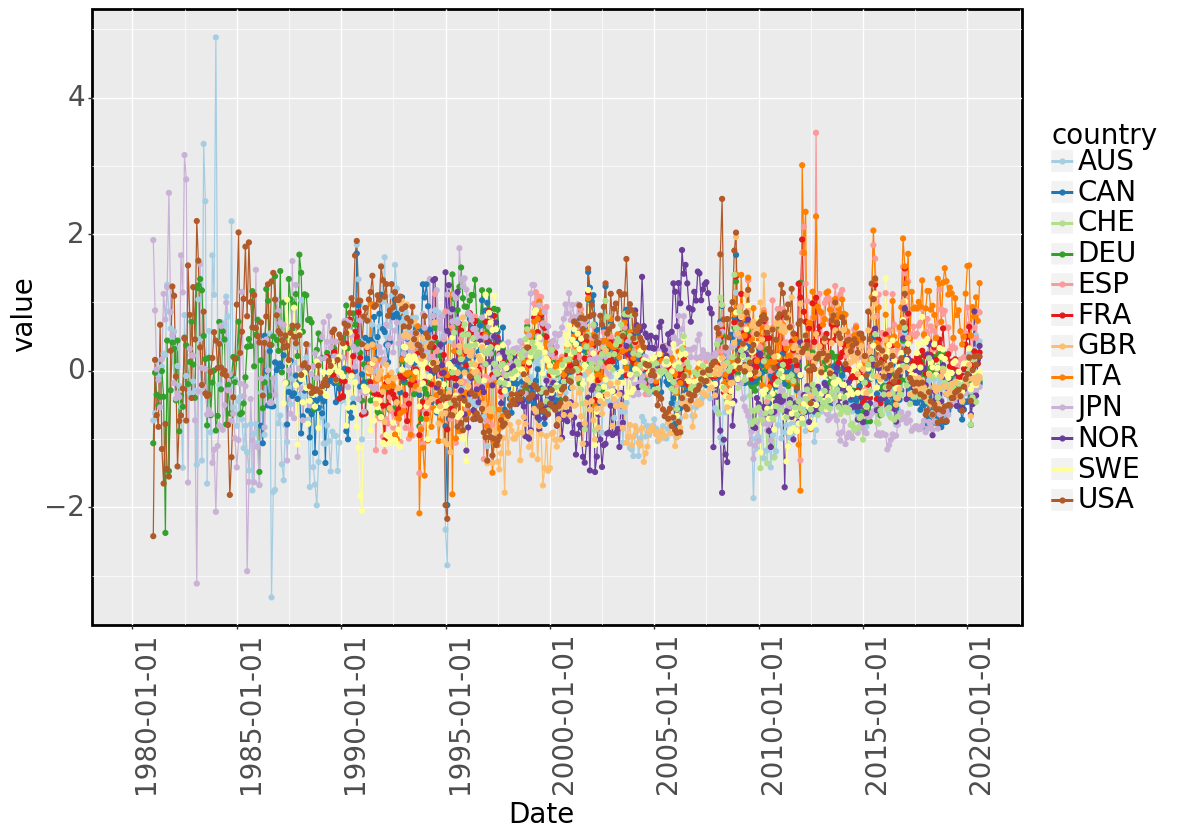

<ggplot: (8733856487537)>

In [102]:
def plot_raw(tbl, ylabel):
    tbl['date'] = tbl.index
    tbl['date'] = tbl['date'].map(lambda x: x.to_timestamp())
    tbl = tbl.melt(id_vars='date')
    return (
        ggplot(tbl, aes(x='date', y='value', color='country')) +
            geom_line() +
            geom_point() +
            scale_color_brewer(type='qualitative', palette=3) +
            ylab(ylabel) +
            xlab('Date') +
            scale_x_date() +
            #theme_minimal() +
            theme(
                text=element_text(size=20),
                figure_size=(12, 8),
                legend_position='right',
                axis_text_x=element_text(size=20, angle=90, hjust=0),
                panel_border=element_rect(colour="black", size=2),
            )
    )


plot_raw(multistep_n_derivative_predict(tbl, s=1), 'value')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1061 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


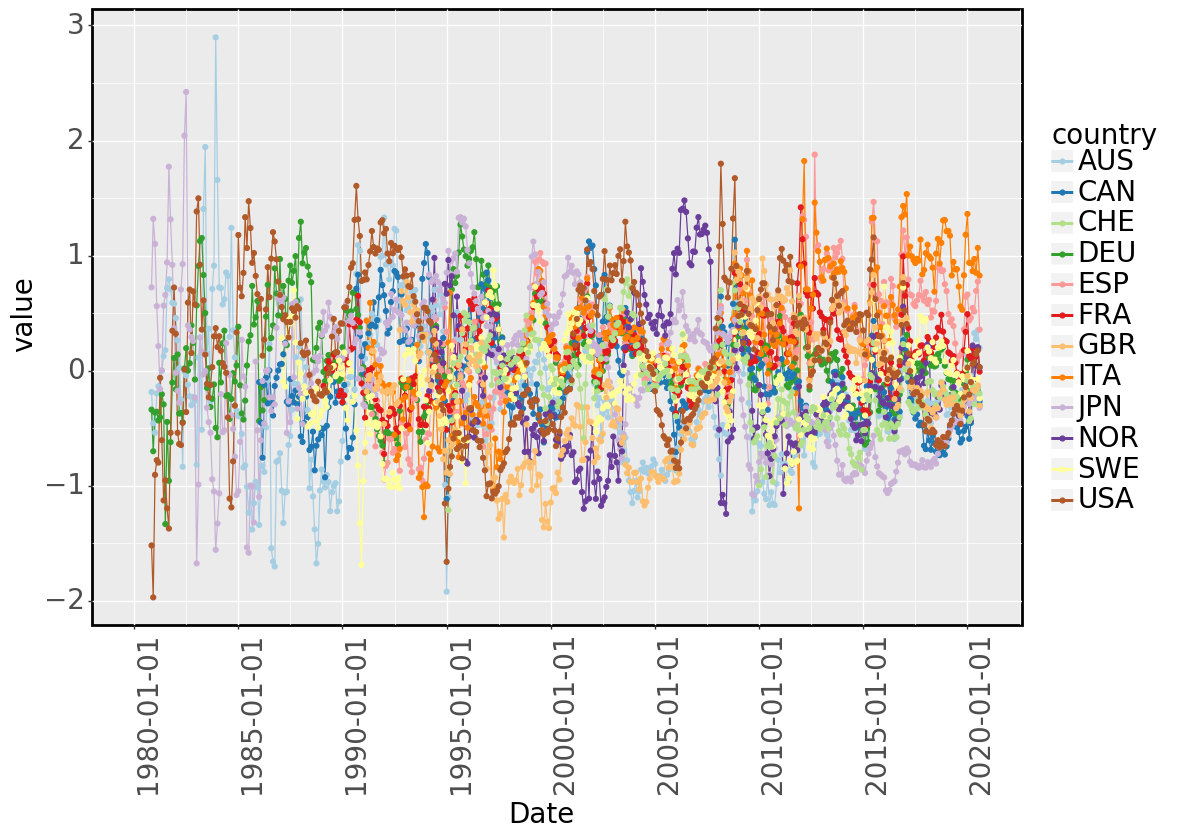

<ggplot: (8733857338870)>

In [103]:
plot_raw(tbl, 'value')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1097 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


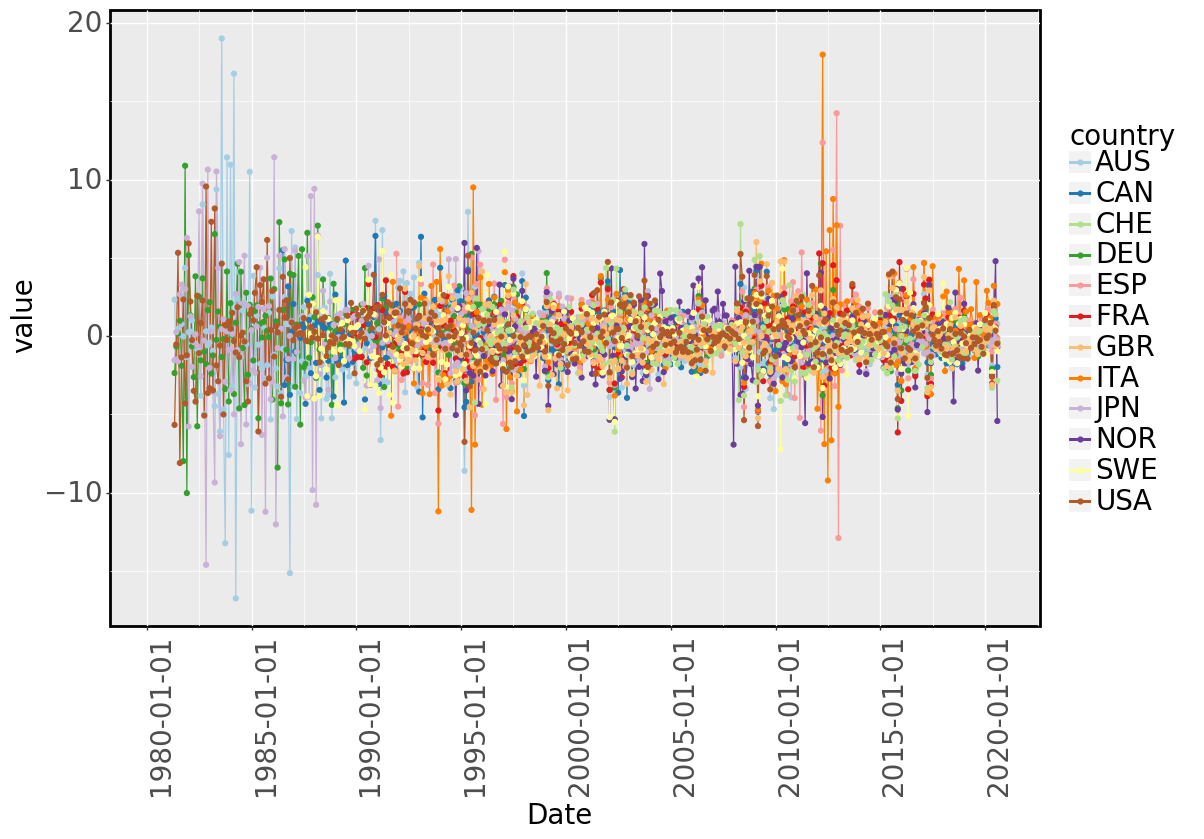

<ggplot: (8733855566421)>

In [107]:
plot_raw(multistep_n_derivative_predict(tbl, s=3), 'value')